# i. Intro

## Objective

Developing a prediction model that can be used effectively and got a high accuracy on the prediction to be used on the daily demand forecasting.

# ii. Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from phik import phik_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
import joblib
import json

# iii. Data Loading

In [2]:
# Data Import
d = "https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Daily_Demand_Forecasting_Orders.csv"
data = pd.read_csv(d, delimiter=";")

In [3]:
data.head(5)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556.0,44914.0,188411,14793.0,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419.0,21399.0,89461,7679.0,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992.0,NaN,21305,14947.0,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971.0,33703.0,69054,18423.0,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534.0,19646.0,16411,20257.0,210.517


In [4]:
data.shape

(60, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    59 non-null     float64
 3   Urgent order                                                        58 non-null     float64
 4   Order type A                                                        58 non-null     float64
 5   Order type B                                                        59 non-null     float64
 6   Order type C                                                        58 non-null     float64
 7   Fiscal sector order

## 3.1 Data Augmentation

# iv. Exploratory Data Analysis

In [6]:
# Copying Dataset

df = data.copy()

## 4.1 Checking Duplication Data

In [7]:
df.duplicated().sum()

0

## 4.2 Checking Missing Value

In [8]:
df.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      1
Urgent order                                                          2
Order type A                                                          2
Order type B                                                          1
Order type C                                                          2
Fiscal sector orders                                                  1
Orders from the traffic controller sector                             3
Banking orders (1)                                                    5
Banking orders (2)                                                    0
Banking orders (3)                                                    4
Target (Total orders)                                                 0
dtype: int64

In [18]:

jumlah_missing = data.isnull().sum().sum()

print("Amount of data with missing value:", jumlah_missing)

Amount of data with missing value: 21


## 4.3 Statistik Deskriptif

In [11]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,59.000000,58.000000,58.000000,59.000000,58.000000,59.000000,57.000000,55.000000,60.000000,56.000000,60.000000
mean,3.016667,4.033333,173.399322,119.638845,52.231517,109.032644,139.753983,78.626356,44426.368421,47427.818182,79401.483333,21968.428571,300.873317
std,1.282102,1.401775,69.791343,27.351816,19.052951,51.153749,42.136702,187.857682,12292.879063,46276.901015,40504.420041,11530.577975,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,6440.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,126.917500,102.595750,40.054500,74.219500,113.026750,1.236500,35033.000000,20014.000000,50680.500000,12536.250000,238.195500
50%,3.000000,4.000000,151.341000,113.698000,47.166500,99.072000,126.721500,9.135000,43284.000000,32150.000000,67181.000000,17155.000000,288.034500
75%,4.000000,5.000000,195.256000,132.748750,58.236000,133.177000,161.398500,20.664500,52042.000000,45323.500000,94787.750000,30229.000000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,55445.000000,616.453000


## 4.4 Visualization

### 4.4.1 Data Distribution

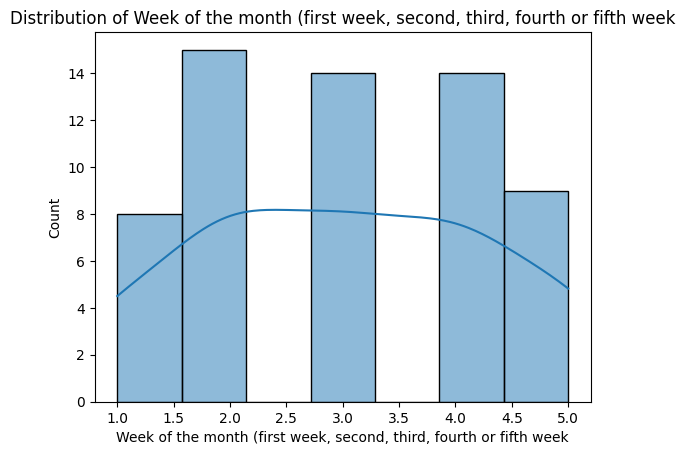

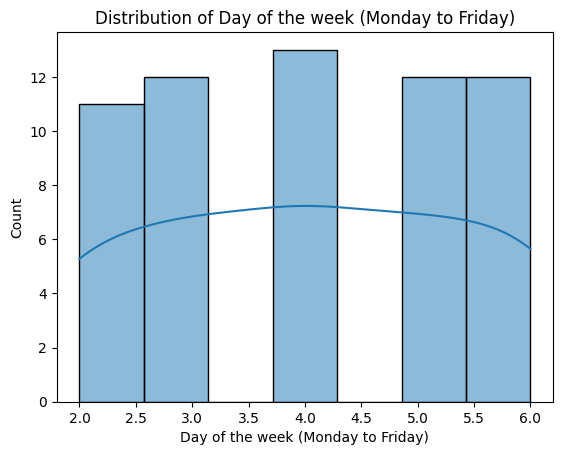

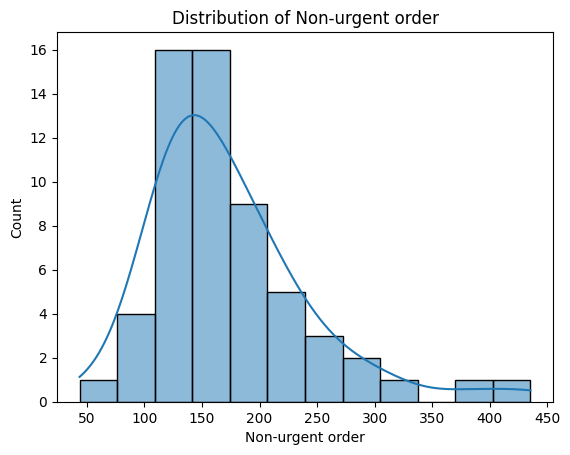

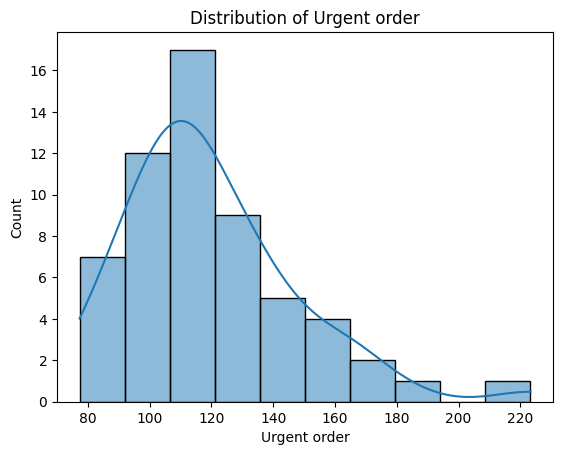

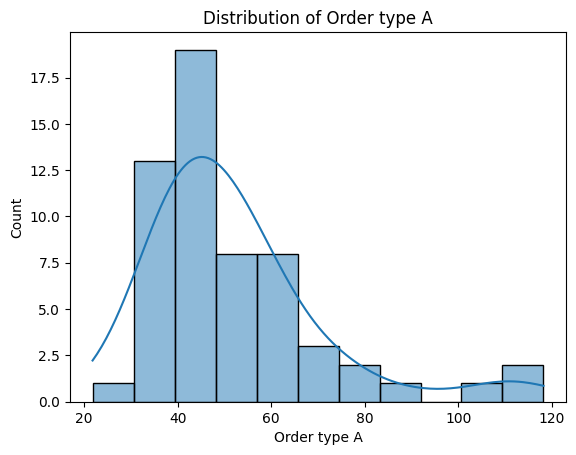

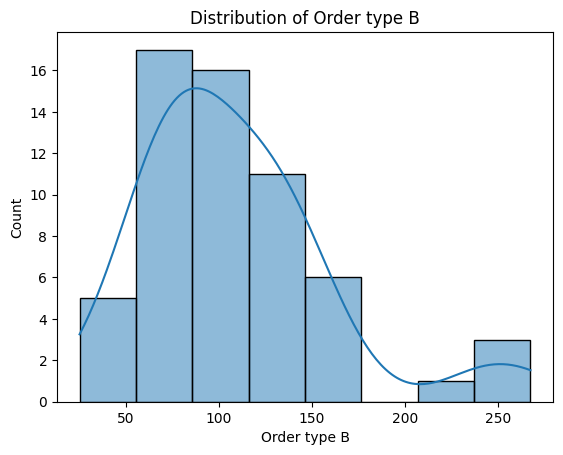

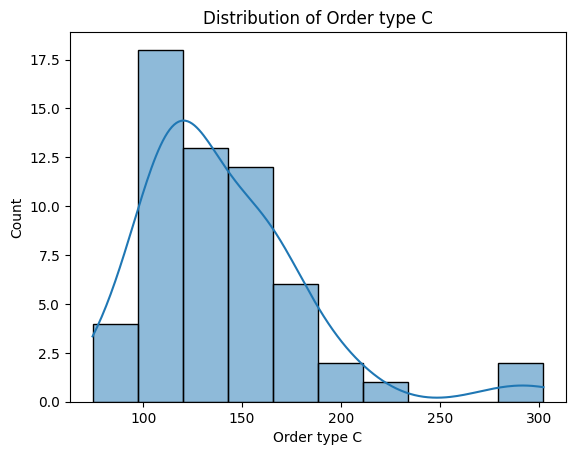

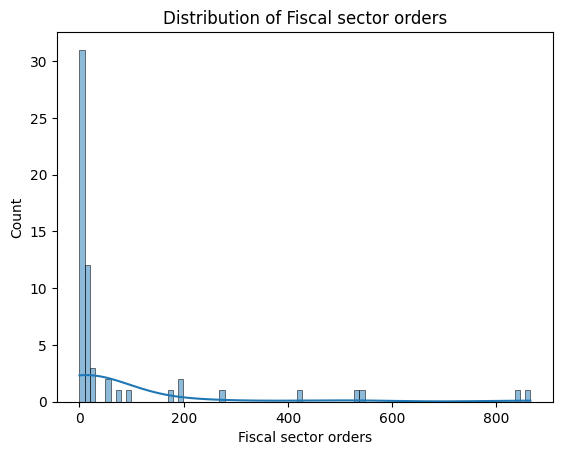

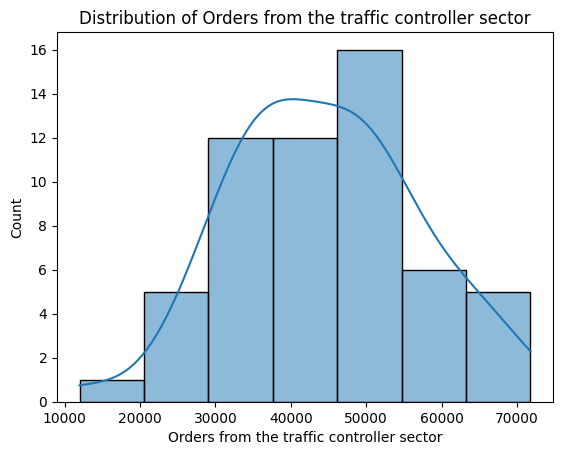

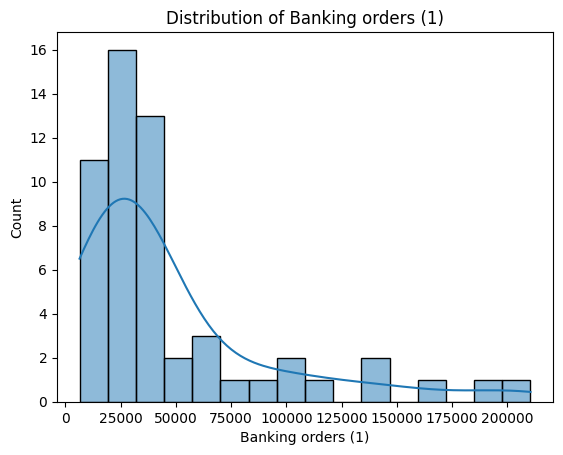

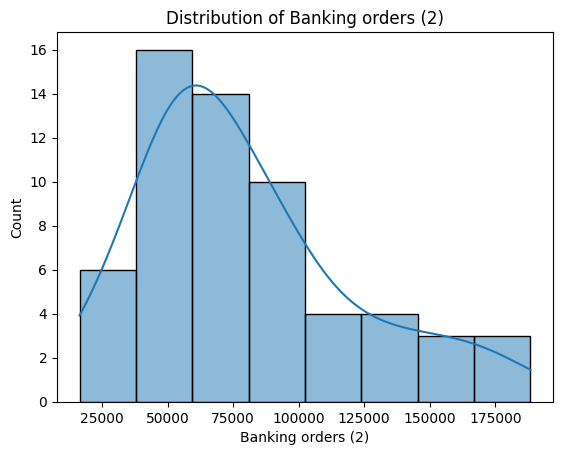

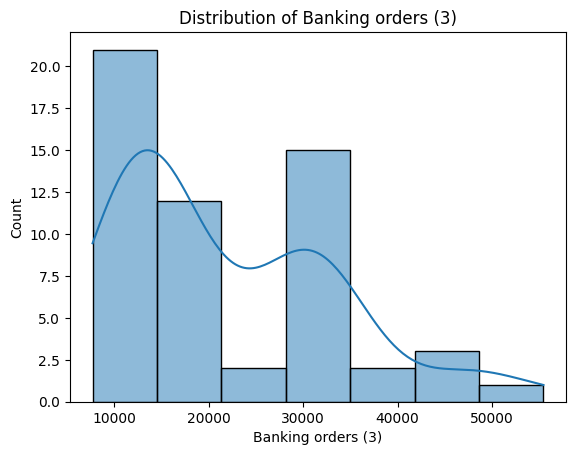

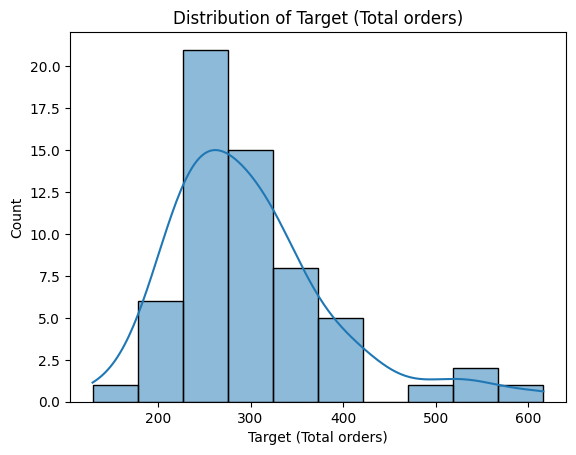

In [12]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### 4.4.2 Data Correlation

In [13]:
# Melihat daftar kolom
kolom = df.columns.tolist()

# Menampilkan daftar kolom
print(kolom)

['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)', 'Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders', 'Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']


In [14]:
temp = df[['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)', 'Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders', 'Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']]

In [16]:
correlation_matrix = phik_matrix(temp)

interval columns not set, guessing: ['Week of the month (first week, second, third, fourth or fifth week', 'Day of the week (Monday to Friday)', 'Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C', 'Fiscal sector orders', 'Orders from the traffic controller sector', 'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']


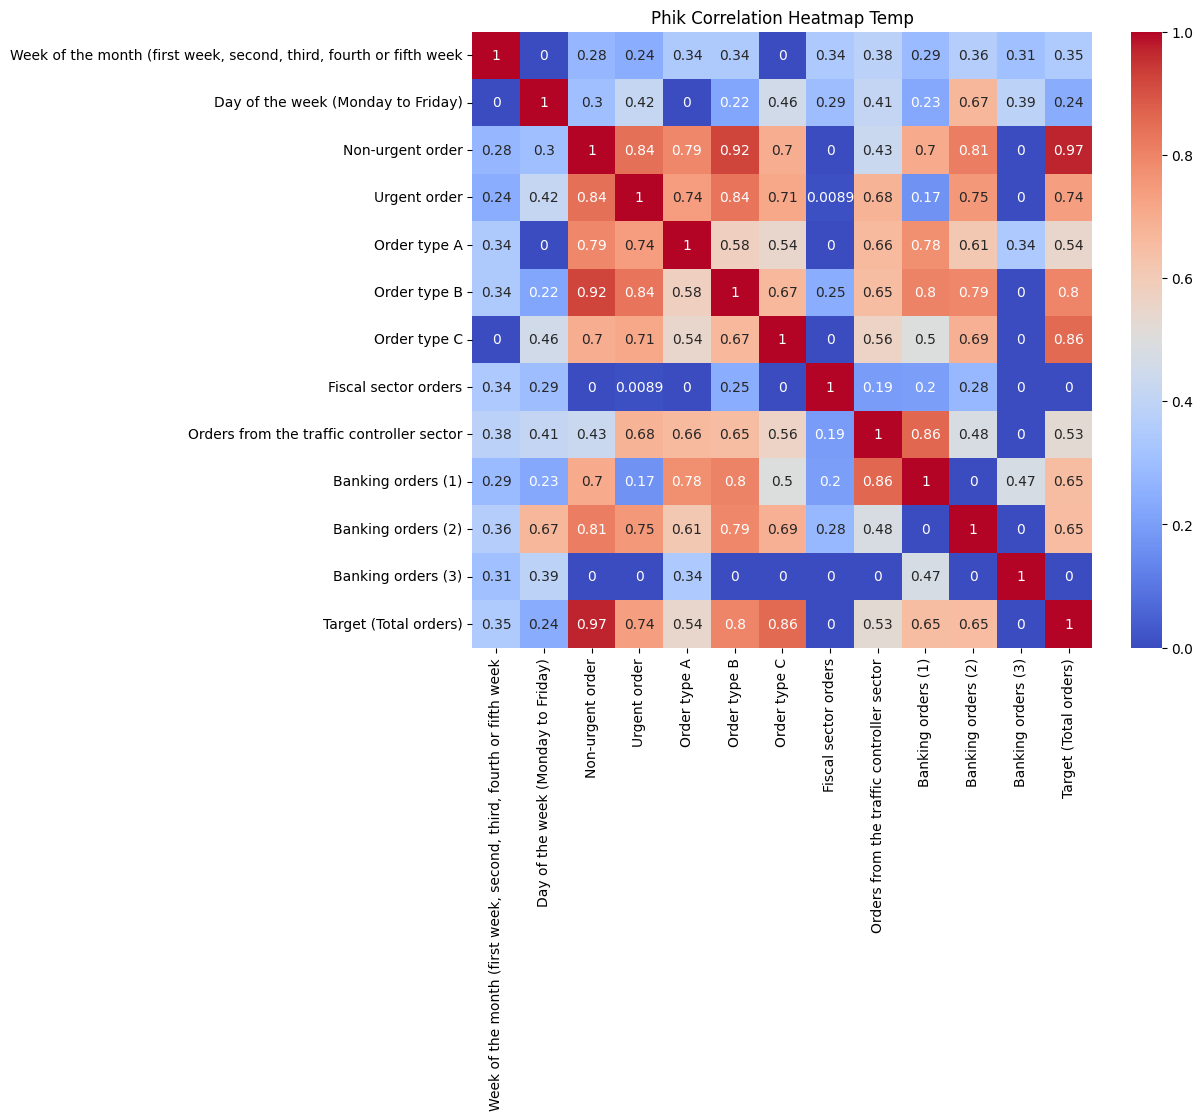

In [17]:
# Create heatmap from correlation_matrix temp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Heatmap Temp')
plt.show()

Looking at the correlation matrix above, there are 4 variabel or feature that got really strong correlation to the data target ( Total orders), the feature are Non-urgent order (0.97), Order type C (0.86), Order type B (0.8), and Urgent order (0.74).

# v. Feature Engineering

# 5.1 Missing Value

In [19]:
# Iterative imputer
df_iterative = df.copy()
iterative_imputer = IterativeImputer(random_state=42)
df_iterative = iterative_imputer.fit_transform(df_iterative)
df_iterative = pd.DataFrame(df_iterative, columns=df.columns)

In [20]:
# knn imputer
df_knn = df.copy()
knn_imputer = KNNImputer()
df_knn = knn_imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

## 5.2 Data Augmentation

We are doing data augmentation on to the dataset because of the data is only consisted about 60 data, it will make the modelling process not effective because of the model that are going to be produced will be overfit.

In [27]:
# Create synthetic data for Iterative imputer
num_synthetic_samples = 600
synthetic_data = []

for _ in range(num_synthetic_samples):
    synthetic_sample = df_iterative.copy() 
    for column in synthetic_sample.columns:
        synthetic_sample[column] = synthetic_sample[column] + np.random.normal(0, 0.1, len(synthetic_sample))
    synthetic_data.append(synthetic_sample)

df_i = pd.concat(synthetic_data, ignore_index=True)

In [28]:
# Create synthetic data for KNN imputer
num_synthetic_samples = 600
synthetic_data = []

for _ in range(num_synthetic_samples):
    synthetic_sample = df_iterative.copy() 
    for column in synthetic_sample.columns:
        synthetic_sample[column] = synthetic_sample[column] + np.random.normal(0, 0.1, len(synthetic_sample))
    synthetic_data.append(synthetic_sample)

df_k = pd.concat(synthetic_data, ignore_index=True)

## 5.3 Data Split

In [35]:
# Iterative Imputer

X_i = df_i.drop(columns=["Target (Total orders)"])
y_i = df_i["Target (Total orders)"]
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size=0.2, random_state=10)

In [36]:
# KNN Imputer

X_k = df_k.drop(columns=["Target (Total orders)"])
y_k = df_k["Target (Total orders)"]
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.2, random_state=10)

# vi. Model Definition

In this modelling analysis we're gonna make Regression model using Linear Regression.

# vii. Model Training

In [39]:
# Iterative Imputer
model_i = LinearRegression()
rfe_i = RFE(estimator=model_i, n_features_to_select=5)
rfe_i.fit(X_train_i, y_train_i)
feature_i = X_train_i.columns[rfe_i.support_]
model_i.fit(X_train_i[feature_i], y_train_i)
y_pred_i = model_i.predict(X_test_i[feature_i])

In [40]:
# KNN imputer
model_k = LinearRegression()
rfe_k = RFE(estimator=model_k, n_features_to_select=5)
rfe_k.fit(X_train_k, y_train_k)
feature_k = X_train_k.columns[rfe_k.support_]
model_k.fit(X_train_k[feature_k], y_train_k)
y_pred_k = model_k.predict(X_test_k[feature_k])

# viii. Model Evaluation

In [41]:
rmse_i = mean_squared_error(y_test_i, y_pred_i, squared=False)
rmse_k = mean_squared_error(y_test_k, y_pred_k, squared=False)

print("RMSE (Iterative Imputer):", rmse_i)
print("RMSE (KNN Imputer):", rmse_k)

RMSE (Iterative Imputer): 0.20010240082830144
RMSE (KNN Imputer): 0.20090520509399806


Looking at the evaluation of the model that are already made, the difference between Iterative Imputer one and the KNN Imputer is not significant. But considering we are going to use the best one, we are going to use the Iterative Imputer one because of the RMSE on the Iterative is still smaller compared to the KNN eventhough its not really a big margin.

In [42]:
y_train_pred = model_i.predict(X_train_i[feature_i])
y_test_pred = model_i.predict(X_test_i[feature_i])

mape_train = mean_absolute_percentage_error(y_train_i, y_train_pred) * 100
mape_test = mean_absolute_percentage_error(y_test_i, y_test_pred) * 100

print("MAPE on Training Data:", mape_train)
print("MAPE on Test Data:", mape_test)

MAPE on Training Data: 0.05682829127271092
MAPE on Test Data: 0.05730341745622328


Looking at the score of the MAPE from the model, we can see that the model is fit because of the difference between the train and test of the data is not significant with the value of MAPE on the model is about 5.7%.

In [44]:
mse_train = mean_squared_error(y_train_i, y_train_pred)
mse_test = mean_squared_error(y_test_i, y_test_pred)

r2_train = r2_score(y_train_i, y_train_pred)
r2_test = r2_score(y_test_i, y_test_pred)

# Print hasil evaluasi metrics
print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Test Data:", mse_test)
print("R-squared on Training Data:", r2_train)
print("R-squared on Test Data:", r2_test)

Mean Squared Error on Training Data: 0.03934282259206729
Mean Squared Error on Test Data: 0.040040970817250214
R-squared on Training Data: 0.9999950392323654
R-squared on Test Data: 0.9999948336960958


Looking at the MSE and R Squared value of the model, we can see that the model got a good score both on MSE and R2 on the training and test data. An R-squared value approaching 1 (in this case, very close to 1) indicates that your model is capable of explaining nearly all of the variation in the target data. On the other hand, a low Mean Squared Error (MSE) indicates that the difference between the model's predictions and the actual data is very small.

## Cross Validation

In [52]:
# Define the model 
model = model_i

# Define the scoring functions
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for MSE
mse_scores = cross_val_score(model, X_train_i, y_train_i, cv=5, scoring=mse_scorer)
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Perform cross-validation for R-squared (R^2)
r2_scores = cross_val_score(model, X_train_i, y_train_i, cv=5, scoring=r2_scorer)
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print("Cross-Validation Data Training Results:")
print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)
print("Mean R-squared (R^2):", mean_r2)
print("Standard Deviation of R^2:", std_r2)

Cross-Validation Data Training Results:
Mean MSE: 0.03937112497037101
Standard Deviation of MSE: 0.0004617844430918636
Mean R-squared (R^2): 0.9999950339401238
Standard Deviation of R^2: 1.0684110450065184e-07


In [53]:
# Define the model 
model = model_i

# Define the scoring functions
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for MSE
mse_scores = cross_val_score(model, X_test_i, y_test_i, cv=5, scoring=mse_scorer)
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Perform cross-validation for R-squared (R^2)
r2_scores = cross_val_score(model, X_test_i, y_test_i, cv=5, scoring=r2_scorer)
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print("Cross-Validation Data Test Results:")
print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)
print("Mean R-squared (R^2):", mean_r2)
print("Standard Deviation of R^2:", std_r2)

Cross-Validation Data Test Results:
Mean MSE: 0.04007653955204129
Standard Deviation of MSE: 0.0012897777384090051
Mean R-squared (R^2): 0.9999948034251058
Standard Deviation of R^2: 3.349185915816723e-07


# ix. Model Saving

In [54]:
with open('model.pkl', 'wb') as file_1:
  joblib.dump(model_i, file_1)

# x. Conclusion

* The dataset only consisting of 60 line and 13 feature
* There are 21 line of data that got missing value
* There are 4 variabel or feature that got really strong correlation to the data target ( Total orders), the feature are Non-urgent order (0.97), Order type C (0.86), Order type B (0.8), and Urgent order (0.74). 

Modelling Evaluation Conclusion

* The dataset considered small so a syntetic data are needed on the modelling to avoid the risk of overfitting.
* Iterative Imputer is the final model that are used on the modelling based on the RMSE value, eventhough the value difference is not really significant.
* Looking at the score of the MAPE from the model, the model is fit because of the difference between the train and test of the data is not significant with the value of MAPE on the model is about 5.7%.
* The model got a good score both on MSE and R2 on the training and test data. An R-squared value approaching 1 (in this case, very close to 1) indicates that your model is capable of explaining nearly all of the variation in the target data. On the other hand, a low Mean Squared Error (MSE) indicates that the difference between the model's predictions and the actual data is very small.
